# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [36]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite

In [129]:
# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [131]:
def movie_choice():
    
    movie_choice = nx.read_edgelist("../data/Employee_Movie_Choices.txt",delimiter= '\t') #,create_using=nx.MultiDiGraph())
        
    # Your Code Here
    
    return movie_choice # Your Answer Here
movie_choice()

<IPython.core.display.Javascript object>


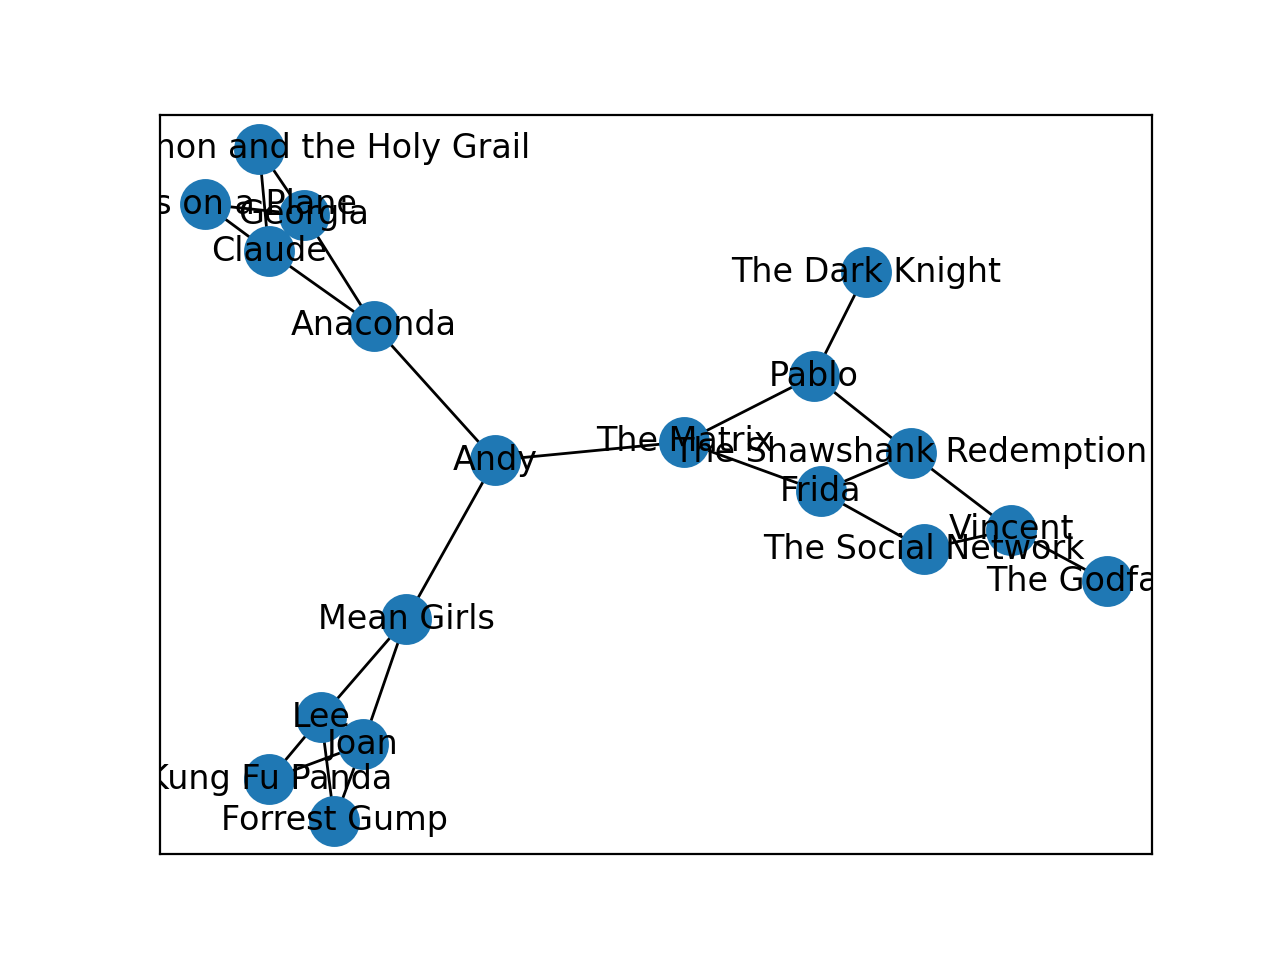

In [92]:
plot_graph(movie_choice(), weight_name=None)

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [181]:
def answer_two():
    
    # Your Code Here
    G = movie_choice()
    G.add_nodes_from(movies,type = 'movie')
    G.add_nodes_from(employees,type = 'employee')
    
    return G # Your Answer Here
answer_two()

In [61]:
!head ../data/Employee_Movie_Choices.txt

#Employee	Movie
Andy	Anaconda
Andy	Mean Girls
Andy	The Matrix
Claude	Anaconda
Claude	Monty Python and the Holy Grail
Claude	Snakes on a Plane
Frida	The Matrix
Frida	The Shawshank Redemption
Frida	The Social Network


### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [184]:
answer_two().nodes

NodeView(('Andy', 'Anaconda', 'Mean Girls', 'The Matrix', 'Claude', 'Monty Python and the Holy Grail', 'Snakes on a Plane', 'Frida', 'The Shawshank Redemption', 'The Social Network', 'Georgia', 'Joan', 'Forrest Gump', 'Kung Fu Panda', 'Lee', 'Pablo', 'The Dark Knight', 'Vincent', 'The Godfather'))

In [190]:
def answer_three():
        
    # Your Code Here
    WG = answer_two()
    
    WG = bipartite.weighted_projected_graph(WG,employees)
    
    return WG # Your Answer Here

answer_three()

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [273]:
def answer_four():
        
    # Your Code Here
    df_rel = pd.read_csv('../data/Employee_Relationships.txt', sep = '\t', header = None, names = ['from', 'to', 'Relation_rating'])
    
    df_P = pd.DataFrame(answer_three().edges(data=True),columns=['from', 'to', 'weight'])
    df_P['weight'] = df_P['weight'].map(lambda x:x['weight'])

    df_P_inv = df_P.rename(columns={'from':'to', 'to':'from'})[['from', 'to', 'weight']]
    P_df = pd.concat([df_P, df_P_inv])
    corr_df =pd.merge(df_rel, P_df, on=['from', 'to'], how='left').fillna(0)
    corr = corr_df['weight'].corr(corr_df['Relation_rating'])

    
    return corr # Your Answer Here

answer_four()

0.7883962221733474

KeyError: 'One or more row labels was not found'

In [248]:

G = pd.read_csv('../data/Employee_Movie_Choices.txt', sep = '\t', skiprows = 1, names = ['Employee', 'Movie'])
G1 = nx.from_pandas_dataframe(G, 'Employee', 'Movie')

# G1.add_nodes_from(employees, type = 'employee', bipartite = 0)
# G1.add_nodes_from(movies, type = 'movie', bipartite = 1)

# X = set(employees)
# P = bipartite.weighted_projected_graph(G1, X)

# G2 = nx.to_pandas_dataframe(P)

# H = pd.read_csv('../data/Employee_Relationships.txt', sep = '\t', header = None, names = ['Employee', 'Workmate', 'Relation_rating'])
# H['Shared_movies'] = G2.lookup(H['Employee'], H['Workmate'])

# return H['Relation_rating'].corr(H['Shared_movies'])

# answer_four()

AttributeError: module 'networkx' has no attribute 'from_pandas_dataframe'